In [1]:
!git init

Reinitialized existing Git repository in C:/Users/Pierre/.git/


In [6]:
!git clone https://github.com/pierrehaug/PythonForDataAnalysis.git

fatal: destination path 'PythonForDataAnalysis' already exists and is not an empty directory.


In [7]:
!git add MiniBooNE_HAUGUEL_Pierre.ipynb

The file will have its original line endings in your working directory


In [8]:
!git commit -m "update commit"

[master c78b275] first commit
 1 file changed, 61 insertions(+), 5 deletions(-)


In [ ]:
!git push -u origin --all

# IMPORT de librairies (Scikit-Learn, Pandas, matplotlib)

In [56]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn import grid_search
import matplotlib.pyplot as plt
seed_num = 1337

# Déclaration de fonctions

In [33]:
#Fonction récupéré du jupyter python de M. JOUIN Romain : scikit_learn_classification_cancer 
def draw_confusion_matrix(y_test, predictions, title):
    from sklearn.metrics import confusion_matrix,accuracy_score
    import matplotlib.pyplot as plt
    cm    = confusion_matrix(y_test, predictions)
    accur = accuracy_score  (y_test, predictions)
    
    plt.matshow  (cm)
    plt.ylabel   ('True Label')
    plt.xlabel   ('Predicted Label')
    plt.suptitle ('Confusion matrix (Accuracy of %.2f) for [%s]'%(accur,title))
    plt.colorbar ()
    plt.show     ()

# Lecture du fichier 'MiniBooNE'

In [3]:
inputFile = 'MiniBooNE_PID.txt'
with open(inputFile) as f:
    first_line = f.readline().strip()
signal_rec = int(first_line.split(" ")[0]) #Prend la 1ère valeur du fichier 36499 : enregistrement signal
background_rec = int(first_line.split(" ")[1]) #Prend la 2ème valeur du fichier 93565 : enregistrement "background"

widthVector = [14] * 50 #taille max des valeurs que l'on accepte : 14 digits
colNames = ["col" + str(i) for i in range(1,51)] #On nomme les colonnes des observation colX avec X numéro de la colonne
#read_fwf facilite la lecture d'un dataset qui n'est pas séparé par un séparateur conventionnel de type ";" ou ","
#La première ligne est une information générale sur la proportion des electrons neutrino, et ne fait pas partie directement du dataset donc on "skiprows" la 1ere ligne
df = pd.read_fwf(inputFile, widths=widthVector, header=None, names=colNames, skiprows=1, index_col=False)
df['targetVar'] = 0 #création d'une nouvelle colonne targetVar qu'on met a 0
df.iloc[:signal_rec, len(df.columns)-1] = 1 #Rempli la colonne avec des 1 en fonction du nombre de signal values/background values

In [4]:
total_columns = len(df.columns)
total_real_col = total_columns-1 #On ne compte pas la colonne targetVar mais seulement les colonnes du dataset original

In [6]:
df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col42,col43,col44,col45,col46,col47,col48,col49,col50,targetVar
0,2.59413,0.468803,20.691600,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,-31.37300,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996,1
1,3.86388,0.645781,18.137500,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,45.95970,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621,1
2,3.38584,1.197140,36.080700,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,-11.56080,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901,1
3,4.28524,0.510155,674.201000,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,-18.45860,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990,1
4,5.93662,0.832993,59.879600,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,42.96000,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893,1
5,4.41251,2.157210,66.785300,0.335389,0.004274,0.133690,0.696868,0.753386,3.45575,0.150908,...,-18.54690,0.638310,5.97304,0.000000,0.156063,0.458479,3.500280,3.616290,0.189857,1
6,3.41292,0.834852,45.596300,0.253942,0.009479,0.290691,1.273870,0.891223,3.42853,0.227561,...,-11.36540,0.060045,4.85395,0.000000,0.102631,-0.036952,0.862529,0.671407,0.254095,1
7,2.93345,0.243213,9.733080,0.243312,0.018536,0.516637,1.188590,0.904027,3.38835,0.240489,...,-25.02140,0.015407,4.66803,0.001854,0.108072,-0.149434,0.451253,-0.182719,0.229547,1
8,4.10757,0.682600,83.692500,0.263911,0.005181,0.168942,1.403150,0.889605,3.26032,0.187648,...,-11.01200,0.566295,4.06860,0.000000,0.181448,0.265645,1.500240,0.457965,0.207168,1
9,3.82959,0.507140,29.436500,0.240391,0.010465,0.284973,1.305070,0.898304,3.05597,0.197686,...,16.64020,0.567033,1.72581,0.000000,0.195321,0.106837,2.030230,0.188336,0.296247,1


In [9]:
#On split notre dataset en X et Y : X sont toutes les colonnes colx pour les mesures et Y est notre colonne targetVar
if total_columns:
    x_df = df.iloc[:,0:total_real_col]
    y_df = df.iloc[:,total_real_col]
else:
    x_df = df.iloc[:,1:total_real_col]
    y_df = df.iloc[:,0]

In [10]:
x_df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50
0,2.59413,0.468803,20.691600,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.1740,-31.37300,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.137500,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.5160,45.95970,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.080700,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.9310,-11.56080,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.201000,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.9780,-18.45860,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.879600,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.5550,42.96000,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893
5,4.41251,2.157210,66.785300,0.335389,0.004274,0.133690,0.696868,0.753386,3.45575,0.150908,...,153.9430,-18.54690,0.638310,5.97304,0.000000,0.156063,0.458479,3.500280,3.616290,0.189857
6,3.41292,0.834852,45.596300,0.253942,0.009479,0.290691,1.273870,0.891223,3.42853,0.227561,...,137.4190,-11.36540,0.060045,4.85395,0.000000,0.102631,-0.036952,0.862529,0.671407,0.254095
7,2.93345,0.243213,9.733080,0.243312,0.018536,0.516637,1.188590,0.904027,3.38835,0.240489,...,148.2620,-25.02140,0.015407,4.66803,0.001854,0.108072,-0.149434,0.451253,-0.182719,0.229547
8,4.10757,0.682600,83.692500,0.263911,0.005181,0.168942,1.403150,0.889605,3.26032,0.187648,...,151.2800,-11.01200,0.566295,4.06860,0.000000,0.181448,0.265645,1.500240,0.457965,0.207168
9,3.82959,0.507140,29.436500,0.240391,0.010465,0.284973,1.305070,0.898304,3.05597,0.197686,...,163.6900,16.64020,0.567033,1.72581,0.000000,0.195321,0.106837,2.030230,0.188336,0.296247


In [16]:
#DESCRIBE de x_df
x_df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50
count,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,...,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000,130064.000000
mean,1.251799,-2.107551,123.795041,-3.312518,-3.585353,-3.434412,-2.627901,-2.773691,-0.155680,-3.421357,...,141.180058,-25.225963,-2.863924,2.393149,-3.585605,-3.416491,-3.753232,-0.744964,-1.987056,-3.364752
std,60.119987,59.913094,196.010686,59.834554,59.818130,59.827325,59.876644,59.866946,60.024786,59.828000,...,75.499342,67.576409,59.873958,60.349468,59.818121,59.828330,59.816001,60.019330,59.946144,59.831409
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,4.012528,0.876346,49.295075,0.241571,0.000000,0.085307,0.715269,0.783392,3.284817,0.142853,...,122.901750,-40.068250,-0.028108,3.413030,0.000000,0.121963,-0.342814,1.420265,0.274271,0.197322
50%,4.787715,1.381965,106.135500,0.272089,0.004975,0.141175,0.922700,0.833937,3.426990,0.170561,...,145.414500,-21.591600,0.459050,4.762385,0.000000,0.168528,0.041723,2.364455,1.123760,0.231328
75%,5.628298,1.947870,138.849250,0.315095,0.013136,0.212879,1.180252,0.874198,3.585462,0.199982,...,167.087750,-3.330192,1.150463,6.857450,0.001984,0.224737,0.294544,3.777613,2.281242,0.263201
max,17.057300,8.802820,4747.670000,0.736804,0.179012,0.703859,6.241080,0.989713,7.170170,0.524888,...,331.925000,161.298000,43.651200,85.823100,0.446914,0.605667,1.932890,21.768200,25.423300,0.625484


In [19]:
#VALEUR NULL ou NA
x_df.isnull().sum()

col1     0
col2     0
col3     0
col4     0
col5     0
col6     0
col7     0
col8     0
col9     0
col10    0
col11    0
col12    0
col13    0
col14    0
col15    0
col16    0
col17    0
col18    0
col19    0
col20    0
col21    0
col22    0
col23    0
col24    0
col25    0
col26    0
col27    0
col28    0
col29    0
col30    0
col31    0
col32    0
col33    0
col34    0
col35    0
col36    0
col37    0
col38    0
col39    0
col40    0
col41    0
col42    0
col43    0
col44    0
col45    0
col46    0
col47    0
col48    0
col49    0
col50    0
dtype: int64

In [20]:
#On crée nos jeux de tests / trains en faisant une séparation 70 / 30 avec train_test_split de sklearn
valid_size = 0.30
x_traindf,x_testdf,y_traindf,y_testdf = train_test_split(x_df,y_df,test_size=valid_size,random_state=seed_num)
xy_traindf = pd.concat([x_traindf,y_traindf],axis=1)

In [21]:
xy_traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91044 entries, 94892 to 3223
Data columns (total 51 columns):
col1         91044 non-null float64
col2         91044 non-null float64
col3         91044 non-null float64
col4         91044 non-null float64
col5         91044 non-null float64
col6         91044 non-null float64
col7         91044 non-null float64
col8         91044 non-null float64
col9         91044 non-null float64
col10        91044 non-null float64
col11        91044 non-null float64
col12        91044 non-null float64
col13        91044 non-null float64
col14        91044 non-null float64
col15        91044 non-null float64
col16        91044 non-null float64
col17        91044 non-null float64
col18        91044 non-null float64
col19        91044 non-null float64
col20        91044 non-null float64
col21        91044 non-null float64
col22        91044 non-null float64
col23        91044 non-null float64
col24        91044 non-null float64
col25        91044 non-n

In [22]:
#Transformation des valeurs grâce à StandardScaler qui permet de standardiser les valeurs autour d'une moyenne de 0 et un écart type de 1
#On peut dire que nos valeurs suivent une "loi normale" grâce à cette transformation
scaler = StandardScaler()
scaler.fit(x_traindf)
x_traindf = scaler.transform(x_traindf)
x_testdf = scaler.transform(x_testdf)

# SGDClassifier (1er modèle)

### SGDClassifier avec une loss de type : 'hinge' 
#### 'hinge' utilise une 'linear SVM' 

In [24]:
#1ère algo : SGDClassifier
algo = SGDClassifier(random_state=seed_num)
algo.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': None,
 'n_iter': None,
 'n_jobs': 1,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 1337,
 'shuffle': True,
 'tol': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
params = { 'epsilon':[0.01,0.1,0.5],
            'alpha':[0.0001,0.001,0.01]}
grid = grid_search.GridSearchCV(algo,params,n_jobs=-1)
predict = grid.fit(x_traindf,y_traindf)
print(grid.best_score_, grid.best_estimator_)

0.8637471991564518 SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.01,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1337,
       shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\Pierre\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### SGDClassifier avec une loss de type 'log'
#### 'log' est une classification 'probabiliste' me permettant de calculer un AUC

In [41]:
#2eme modèle de classification, on utilise un SGDClassifier avec une loss "log" qui est un classificateur "probabiliste"
#Me permet de calculer un AUC, qui n'est pas possible en utilisant une loss 'hinge' comme le cas précédent.
from sklearn import grid_search
params = { 'epsilon':[0.01,0.1,0.5],
            'alpha':[0.0001,0.001,0.01],
             'loss':['log']}
grid = grid_search.GridSearchCV(algo,params,n_jobs=-1)
grid.fit(x_traindf,y_traindf)
print(grid.best_score_, grid.best_estimator_)

#Prediction
predict = grid.predict(X=x_testdf)

C:\Users\Pierre\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.860979306708844 SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.01,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1337,
       shuffle=True, tol=None, verbose=0, warm_start=False)


#### AUC du SGDClassifier

In [43]:
#AUC pour le SGDClassifier
auc_score = roc_auc_score(y_testdf,grid.predict_proba(x_testdf)[:,1])
print(auc_score)

0.9138372036889907


#### Matrice de confusion et courbe ROC

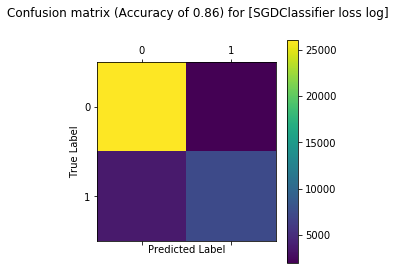

In [45]:
draw_confusion_matrix(y_test=y_testdf,predictions=predict,title='SGDClassifier loss log')

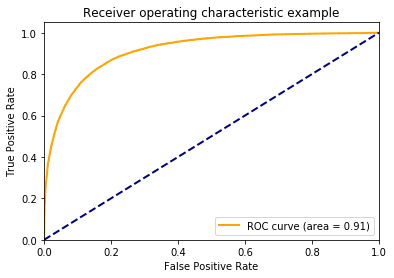

In [46]:
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_testdf,grid.predict_proba(x_testdf)[:,1])

plt.figure()
lw = 2
plt.plot(false_positive_rate, 
         true_positive_rate, 
         color='orange',
         lw=lw, 
         label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# RandomForestClassifier (2ème modèle)

In [57]:
#2ème modèle : RandomForestClassifier
algo = RandomForestClassifier(random_state=seed_num)
algo.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 1337,
 'verbose': 0,
 'warm_start': False}

In [59]:
params = {'n_estimators':[100,300]}
grid = grid_search.GridSearchCV(algo,params,n_jobs=-1)
grid.fit(x_traindf,y_traindf)
print(grid.best_score_, grid.best_estimator_)

#Prediction
predict = grid.predict(X=x_testdf)

0.9347128860770616 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1337, verbose=0,
            warm_start=False)


#### AUC du RandomForestClassifier

In [62]:
#AUC pour le RandomForestClassifier
auc_score = roc_auc_score(y_testdf,grid.predict_proba(x_testdf)[:,1])
print(roc_auc_score(y_testdf,grid.predict_proba(x_testdf)[:,1]))

0.9811079764975909


#### Matrice de confusion et courbe ROC

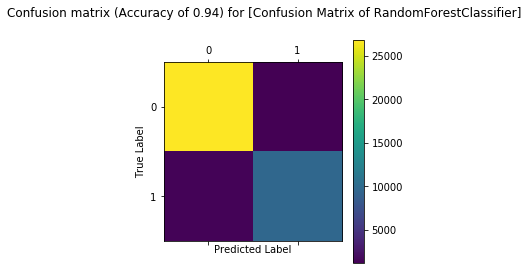

In [60]:
draw_confusion_matrix(y_test=y_testdf,predictions=predict,title='Confusion Matrix of RandomForestClassifier')

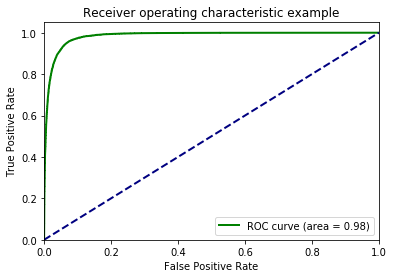

In [63]:
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_testdf,model.predict_proba(x_testdf)[:,1])

#COURBE ROC

plt.figure()
lw = 2
plt.plot(false_positive_rate, 
         true_positive_rate, 
         color='green',
         lw=lw, 
         label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# GradientBoostingClassifier (3ème modèle)

In [49]:
algo = GradientBoostingClassifier(random_state=seed_num)
algo.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 1337,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [50]:
#3ème modèle, on utilise un GradientBoostingClassifier qui obtient des meilleurs résultats que le modèle précédent
params = {'n_estimators':[100,300,500,1000],
           'learning_rate':[0.1,0.3,0.5]}
grid = grid_search.GridSearchCV(algo,params,n_jobs=-1)
grid.fit(x_traindf,y_traindf)
print(grid.best_score_, grid.best_estimator_)

0.9408417907824788 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=1337, subsample=1.0, verbose=0,
              warm_start=False)


In [51]:
model = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.1,random_state=seed_num)
model.fit(x_traindf,y_traindf)
predict = model.predict(x_testdf)
print(accuracy_score(y_testdf,predict))
print(confusion_matrix(y_testdf,predict))

0.9419015889287545
[[26810  1159]
 [ 1108  9943]]


#### AUC du GradientBoostingClassifier

In [53]:
#AUC pour le GradientBoostingClassifier
auc_score = roc_auc_score(y_testdf,model.predict_proba(x_testdf)[:,1])
print(roc_auc_score(y_testdf,model.predict_proba(x_testdf)[:,1]))

0.9837933053710308


#### Matrice de confusion et courbe ROC

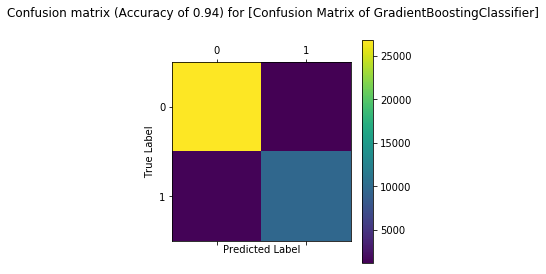

In [61]:
draw_confusion_matrix(y_test=y_testdf,predictions=predict,title='Confusion Matrix of GradientBoostingClassifier')

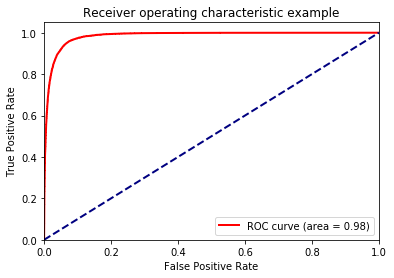

In [55]:
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_testdf,model.predict_proba(x_testdf)[:,1])

#COURBE ROC

plt.figure()
lw = 2
plt.plot(false_positive_rate, 
         true_positive_rate, 
         color='red',
         lw=lw, 
         label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()